In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('BlackFriday.csv')


In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

We can clearly see that dropping these null values will remove 373299 rows from the dataset.

For now, we will remove column 'Product_Category_2' and 'Product_Category_3' as they have too many null values.


In [7]:
del df['Product_Category_2']
del df['Product_Category_3']


In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
df['User_ID']


0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
537572    1004737
537573    1004737
537574    1004737
537575    1004737
537576    1004737
Name: User_ID, Length: 537577, dtype: int64

Lets see how many unique users are there in the dataset.

In [10]:
df['User_ID'].nunique()


5891

Lets also check unique products in the dataset.

In [11]:
df['Product_ID'].nunique()

3623

In [12]:
df['Gender'].unique()


array(['F', 'M'], dtype=object)

In [13]:
df['Age'].nunique() 


7

In [14]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df['Occupation'].unique()


array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [16]:
df['City_Category'].unique()


array(['A', 'C', 'B'], dtype=object)

In [17]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df['Marital_Status'].unique()


array([0, 1])

In [19]:
df['Product_Category_1'].unique()


array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

Average purchase amount 


In [20]:
int(df['Purchase'].mean())


9333

In [21]:
for col in df.columns:
    print(col, ":", df[col].nunique())


User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# Analyzing the Gender

In [22]:
df_m = df[df['Gender'] == 'M']


In [23]:
len(df_m)


405380

In [24]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, index= ['Male', 'Female'])

In [25]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

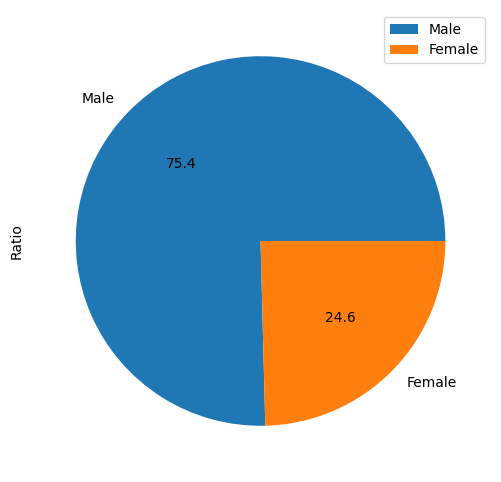

In [26]:
data.plot.pie(y='Ratio', figsize = (6,6), autopct = "%.1f")

<Axes: title={'center': 'Gender Ratio'}>

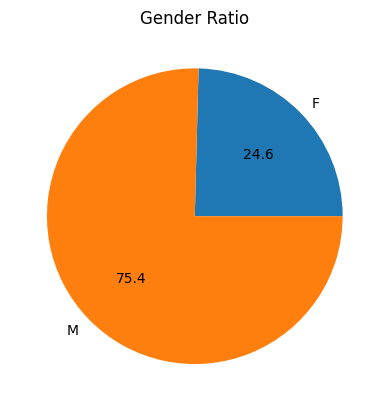

In [27]:
df.groupby('Gender').size().plot(kind='pie', autopct = '%.1f', title='Gender Ratio')

In [28]:
# df.groupby('Gender').sum()['Purchase'].plot(kind='pie', autopct = '%.1f')

# Analysing Age and Marital Status

<Axes: title={'center': 'Purchase distribution by age'}, xlabel='Age'>

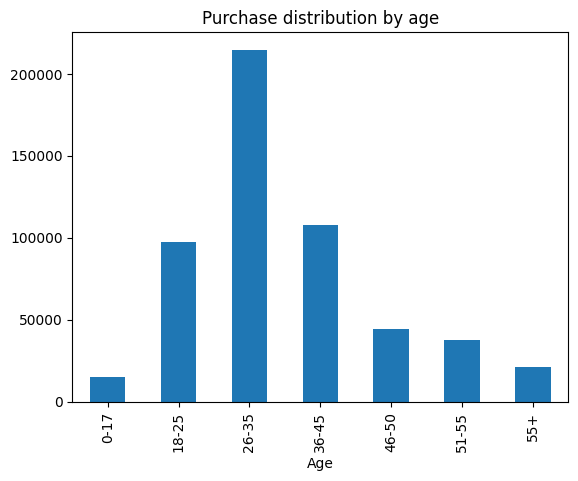

In [29]:
df.groupby('Age').size().plot(kind='bar', title='Purchase distribution by age')

<Axes: title={'center': 'Amount spent by Age'}, xlabel='Age'>

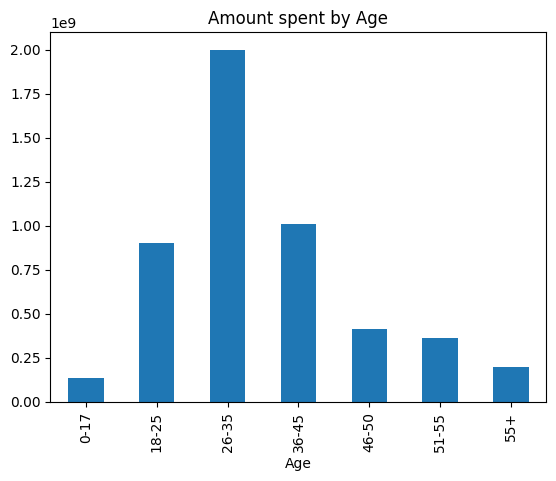

In [30]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar', title='Amount spent by Age')

In [31]:
# df.groupby('Age').mean()

# Multi Column Analysis

<Axes: xlabel='Age', ylabel='count'>

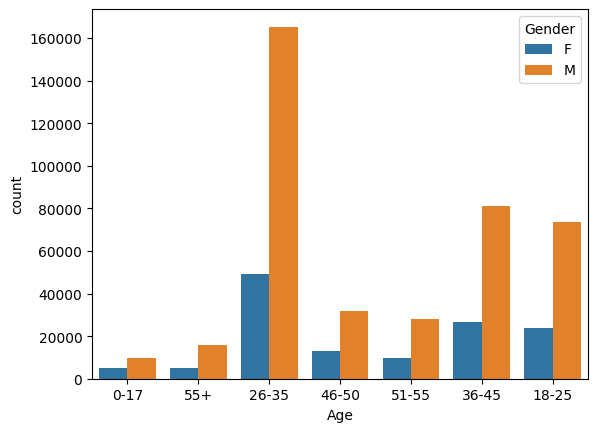

In [32]:
sns.countplot(x = 'Age', hue = 'Gender', data= df)

<Axes: xlabel='Gender', ylabel='count'>

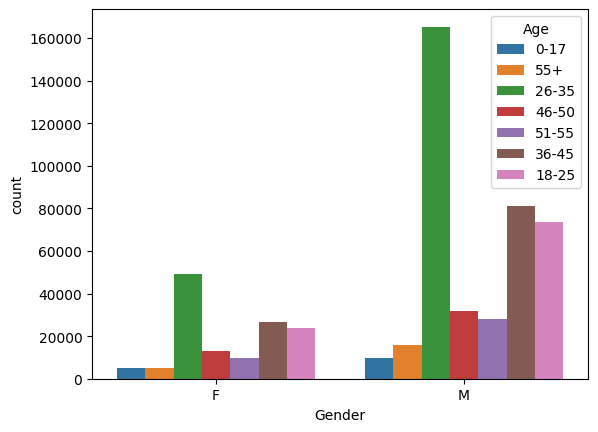

In [33]:
sns.countplot(x = 'Gender', hue = 'Age', data= df)

<Axes: xlabel='City_Category', ylabel='count'>

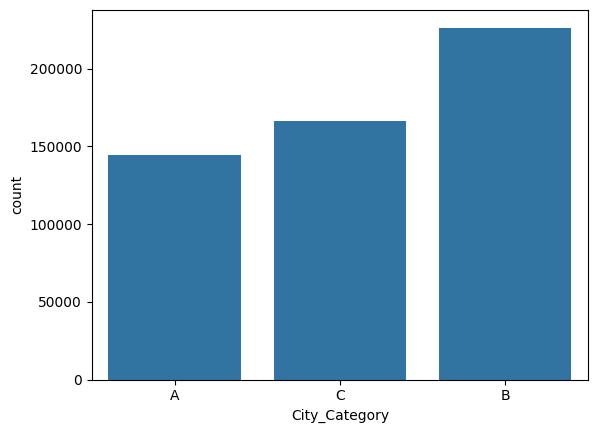

In [34]:
sns.countplot(x=df['City_Category'])

<Axes: >

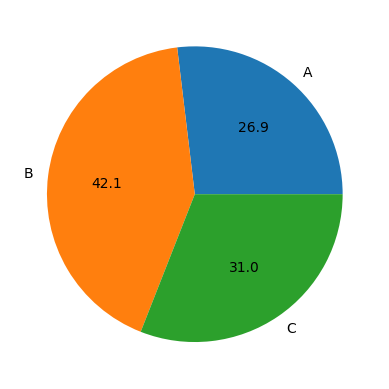

In [35]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')

<Axes: ylabel='Purchase'>

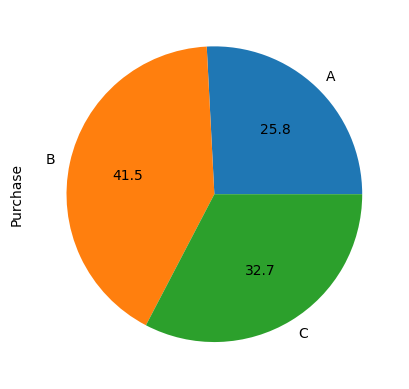

In [36]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [38]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
df = df.dropna(subset=['Purchase'])


In [39]:
# df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%.1f')

Comparing male and female spending based on marriage

# Occupation and Product Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

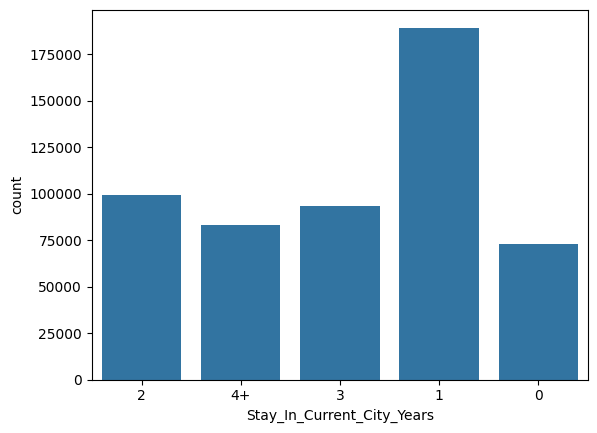

In [40]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

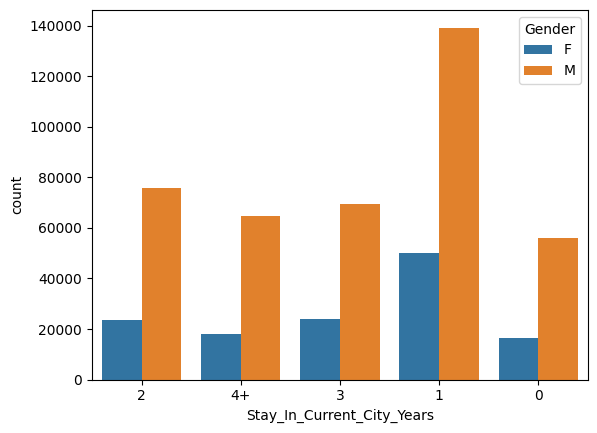

In [41]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue= 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

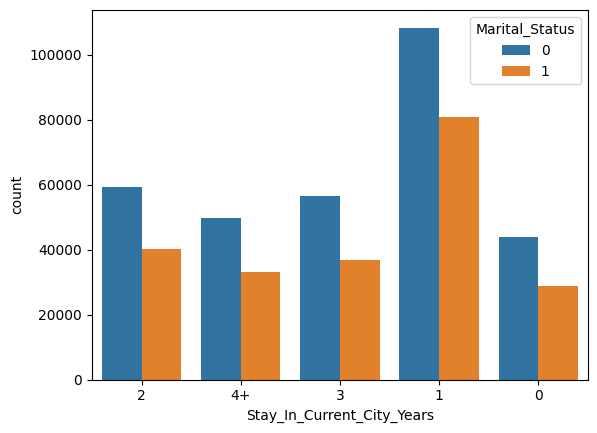

In [42]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue= 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

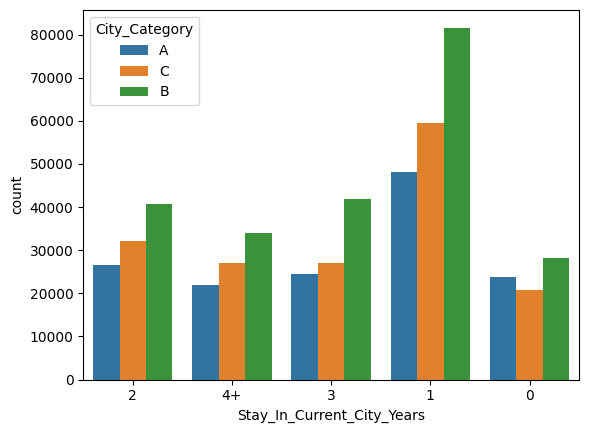

In [43]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue= 'City_Category', data = df)

<Axes: ylabel='Purchase'>

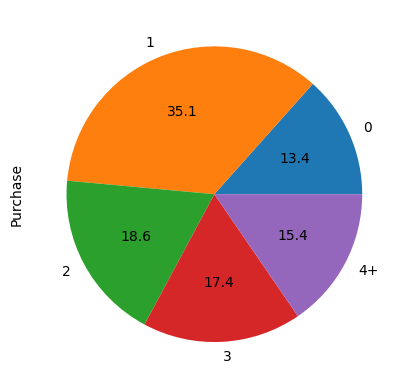

In [44]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='pie', autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years'>

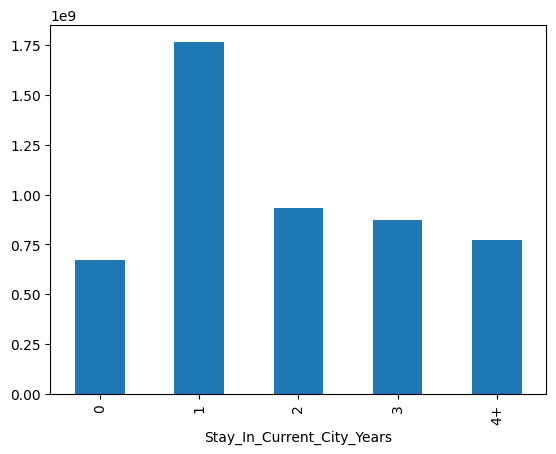

In [45]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

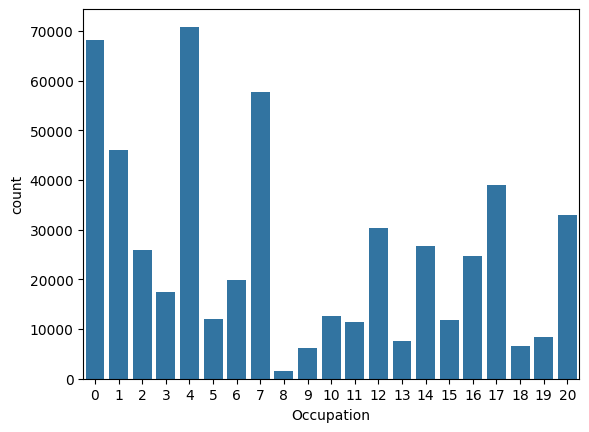

In [46]:
sns.countplot(x= df['Occupation'])

<Axes: xlabel='Occupation'>

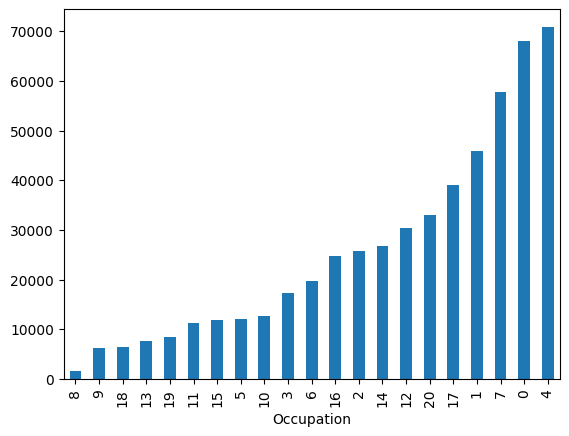

In [47]:
# Tells about the number of product the people are buying
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

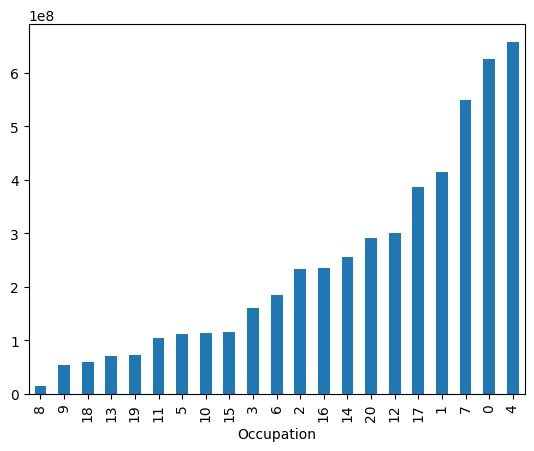

In [48]:
# Tells the number of amount that people of a certain occupation are spending
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

In [49]:
# Lets check poeple fro which occupation are spending the most per product
# df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

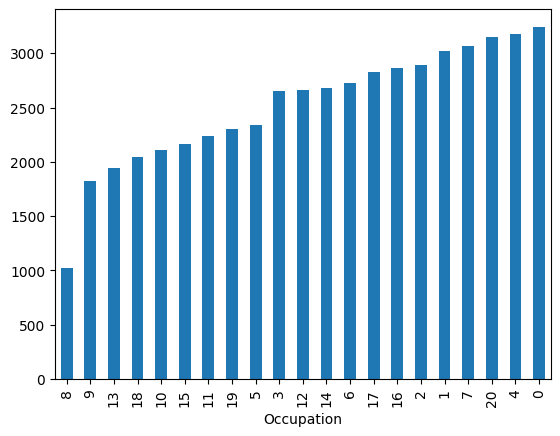

In [50]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

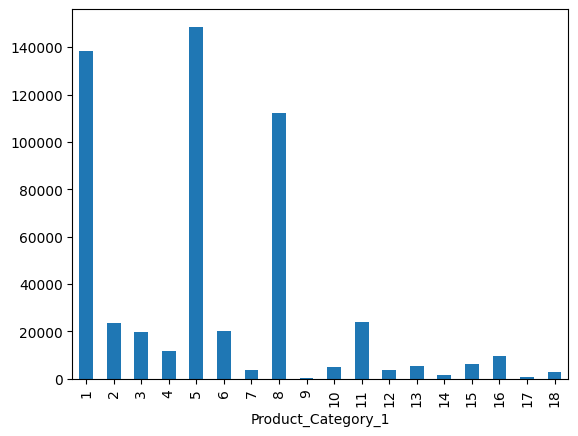

In [51]:
df.groupby('Product_Category_1').size().plot(kind='bar')

Product 8 1 and 5 are being purchased the most

<Axes: xlabel='Product_Category_1'>

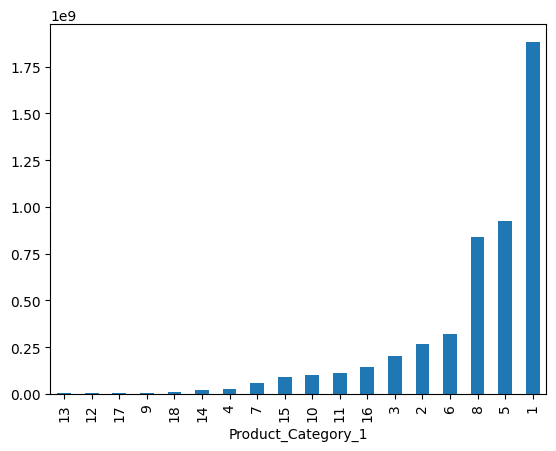

In [52]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

We can plot the mean to further investigate the price of items

<Axes: xlabel='Product_Category_1'>

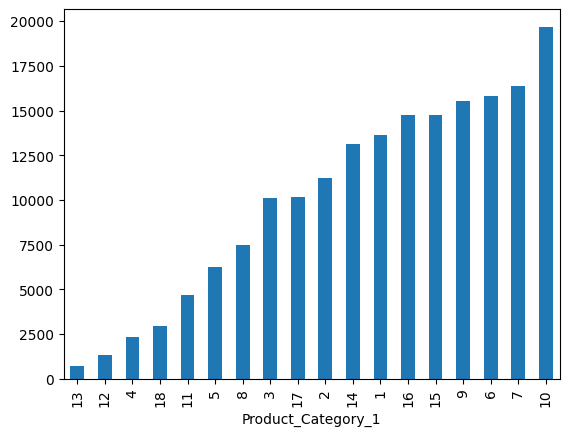

In [54]:
import numpy as np
df.groupby('Product_Category_1')['Purchase'].apply(np.mean).sort_values().plot(kind='bar')

